In [1]:
import numpy as np
import pandas as pd
import low_rank_models as lrm
import matplotlib.pyplot as plt

In [2]:
errorMtx = pd.read_csv('error_matrix.csv', index_col=0).values

In [3]:
def quadratic_loss(A, rank):
    X,Y = lrm.pca(A, rank)
    A_hat = np.dot(np.matrix.transpose(X), Y)
    mse = np.linalg.norm(A_hat - A)/(A.shape[0]*A.shape[1])
    return mse

In [4]:
def quadratic_exp_loss(A, rank):
    X,Y = lrm.pca(A, rank)
    A_hat = np.dot(np.matrix.transpose(X), Y)
    qel = np.sum(np.multiply(np.square(A_hat - A), np.exp(-A)))/(A.shape[0]*A.shape[1])
    return qel

In [5]:
rank = np.arange(3, 20, 1)
quad = np.empty(len(rank))
quadexp = np.empty(len(rank))

for i in range(len(rank)):
    quad[i] = quadratic_loss(errorMtx, rank[i])
    quadexp[i] = quadratic_exp_loss(errorMtx, rank[i])

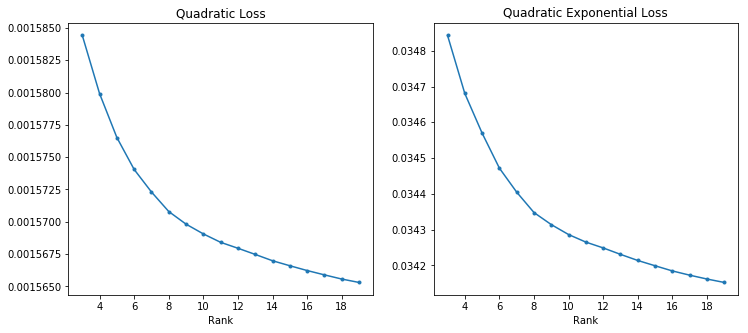

In [9]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(rank, quad, '.-')
plt.title('Quadratic Loss')
plt.xlabel('Rank')

plt.subplot(1, 2, 2)
plt.plot(rank, quadexp, '.-')
plt.title('Quadratic Exponential Loss')
plt.xlabel('Rank')

plt.show()